# RTree

In [1]:
from rtree import index

Provides advanced spatial indexing features

In [2]:
# Index with default constructor
idx = index.Index()
# bounding box that we insert into the index
br = (0.0,0.0,1.0,1.0)
# add this to the index (id,attribute)
idx.insert(0,br)

Add values to it

In [3]:
# add 10,000 squared with length 0.99
for i in range(100):
    for j in range(100):
        idx.insert(i*100 +j,(i,j,i+0.99,j+0.99))

Can use intersection to find the queries that cross or are contained in the query window

In [4]:
for i in idx.intersection((1.0,1.0,2.0,2.0)):
    print(i)

0
101
102
202
201


Find the nearest index to a point. If more than 1 time is at an equal distance both are returned

In [5]:
# coordinates in () and the num of result = 1
for i in idx.nearest((0.8,0.8),1):
    print(i)

0
0


## Same With Geometry

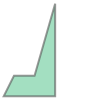

In [6]:
from shapely.geometry import Polygon
polygon = Polygon([(0,0),(1,2),(3,2),(5,9),(5,0)])
polygon

Add it to the index

In [7]:
idx.insert(123456789,polygon.bounds)

In [8]:
for i in idx.intersection((0,2)):
    print(i)

2
123456789


# NetworkX

Package for creation, manipulation and study of structure,dynamics and functions of complex networks.

In [11]:
import networkx as nx

In [14]:
# empty graph network
g = nx.Graph()

## Adding Nodes

In [16]:
#add a node
g.add_node(1)
# add mulitple nodes in a list
g.add_nodes_from([2,3,4,5])
#acess the nodes
g.nodes

NodeView((1, 2, 3, 4, 5))

Add attributes to the node

In [17]:
# for each node give it the color green
for node in g.nodes:
    g.nodes[node]['color'] = 'green'
#give the node with an index 1 a color red
g.nodes[1]['color'] = 'red'

The nodes can be displayed using `draw`<br>

The standard method for obtaining a value from a dictionary is `dictionary[key]`.
An alternative method is to use the `.get` method which allows for a default value if the key does not exist.

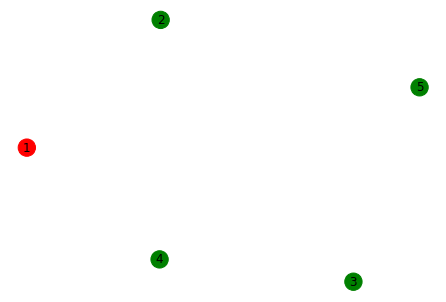

In [18]:
node_colors = []
for node in g.nodes:
    # if no value has been assigned will give it the color blue
    node_colors.append(g.nodes[node].get('color','blue'))
# how to plot the nodes
nx.draw(g, with_labels=True, node_color=node_colors)

## Adding the edges

In [19]:
g.add_edge(0,1, color='blue')
g.add_edges_from([(0,2), (0,3), (0,4), (0,5)], color='purple')

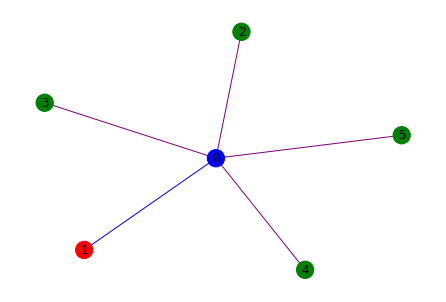

In [21]:
node_colors = []
for node in g.nodes:
    node_colors.append(g.nodes[node].get('color','blue'))

edge_colors = []
for u,v in g.edges:
    edge_colors.append(g.edges[u, v].get('color','black'))

nx.draw(g, with_labels=True,node_color = node_colors, edge_color = edge_colors)

A function to create colors for nodes and edges

In [24]:
# if no color has been assinged
def obtain_colors(graph, default_node='blue', default_edge='black'):
    node_colors = []
    for node in graph.nodes:
        node_colors.append(graph.nodes[node].get('color', default_node))
    edge_colors = []
    for u, v in graph.edges:
        edge_colors.append(graph.edges[u, v].get('color', default_edge))
    return node_colors, edge_colors

Joining networks using `compose`

In [28]:
# new network
h = nx.Graph()

#adding edges
h.add_edges_from([(1,6),(1,7),(1,8),(1,9)],color = 'purple')
#adding nodes
for node in h.nodes:
    h.nodes[node]['color'] = 'grey'

h.nodes[1]['color'] = 'pink'

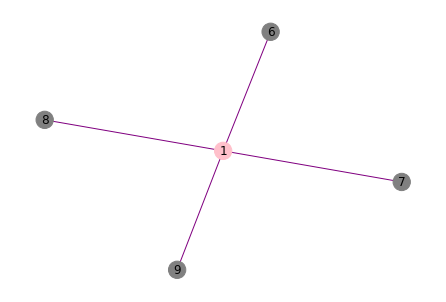

In [29]:
#displaying
node_colors_2,edge_colors_2 = obtain_colors(h)
nx.draw(h, with_labels=True, node_color=node_colors_2, edge_color=edge_colors_2)

Combining

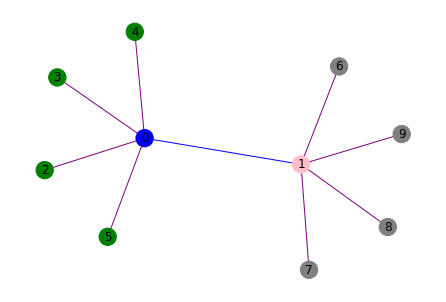

In [31]:
# G is overriding the colors of h
gh = nx.compose(g,h)
node_colors_gh,edge_colors_gh = obtain_colors(gh)
nx.draw(gh,with_labels=True,node_color=node_colors_gh,edge_color=edge_colors_gh)

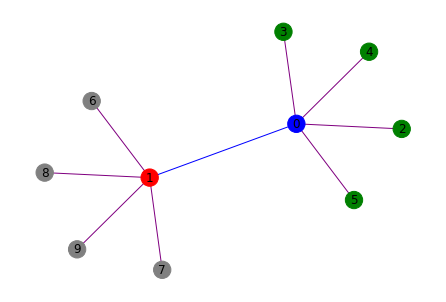

In [32]:
# h is overriding the colors of g
hg = nx.compose(h,g)
node_colors_hg,edge_colors_hg = obtain_colors(hg)
nx.draw(hg,with_labels=True,node_color=node_colors_hg,edge_color=edge_colors_hg)